# The routers data set (single-label, multiclass classification)

In [1]:
from keras.datasets import reuters
import numpy as np

from keras import models
from keras import layers

import matplotlib.pyplot as plt
import copy

from collections import Counter

Using TensorFlow backend.


### load data

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

### explore data

In [3]:
train_data.shape

(8982,)

In [4]:
test_data.shape

(2246,)

In [5]:
train_data[0][:6]

[1, 2, 2, 8, 43, 10]

In [6]:
train_labels[:6]

array([3, 4, 3, 4, 4, 4])

In [7]:
np.unique(train_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [8]:
len(np.unique(train_labels))

46

### back to english

In [9]:
word_index = reuters.get_word_index()

In [10]:
dict(list(word_index.items())[:4])

{'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, 'woods': 8803}

In [11]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [12]:
review0 = [reverse_word_index.get(i - 3, '?') for i in train_data[0]]

In [13]:
decoded_newswire = ' '.join(review0)

# preparing data

### features

In [14]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [15]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [16]:
x_train.shape

(8982, 10000)

In [17]:
x_train[:3]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

### labels

In [18]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [19]:
train_labels[:3]

array([3, 4, 3])

In [20]:
train_labels.shape

(8982,)

In [21]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [22]:
one_hot_train_labels[:3]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [23]:
one_hot_train_labels.shape

(8982, 46)

### Model

In [24]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [25]:
# model = models.Sequential()
# model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
# model.add(layers.Dense(46, activation='softmax'))

Note here 64>46 , otherwise one can lose information

In [26]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### validation sample

In [27]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### Fit

In [28]:
%%time

history = model.fit(partial_x_train, partial_y_train, epochs=6, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/6
7982/7982 [==============================] - 1s 82us/step - loss: 2.5326 - acc: 0.4942 - val_loss: 1.7249 - val_acc: 0.6100
Epoch 2/6
7982/7982 [==============================] - 0s 48us/step - loss: 1.4505 - acc: 0.6868 - val_loss: 1.3498 - val_acc: 0.7070
Epoch 3/6
7982/7982 [==============================] - 0s 46us/step - loss: 1.0999 - acc: 0.7637 - val_loss: 1.1725 - val_acc: 0.7420
Epoch 4/6
7982/7982 [==============================] - 0s 46us/step - loss: 0.8728 - acc: 0.8155 - val_loss: 1.0816 - val_acc: 0.7580
Epoch 5/6
7982/7982 [==============================] - 0s 47us/step - loss: 0.7055 - acc: 0.8477 - val_loss: 0.9850 - val_acc: 0.7810
Epoch 6/6
7982/7982 [==============================] - 0s 46us/step - loss: 0.5685 - acc: 0.8792 - val_loss: 0.9393 - val_acc: 0.8020
CPU times: user 5.84 s, sys: 2.57 s, total: 8.41 s
Wall time: 2.64 s


### Plots

In [29]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

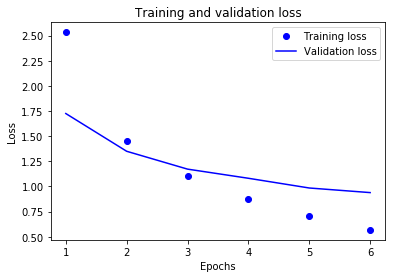

In [30]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

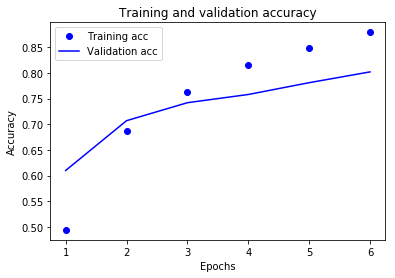

In [31]:
#plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### evaluate on the test set

In [32]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 69us/step


In [33]:
results

[1.0153014400869422, 0.766251113143014]

### determine the probability for a random choice

In [34]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19545859305431879

### Prediction

In [35]:
predictions = model.predict(x_test)

In [36]:
x_test.shape

(2246, 10000)

In [37]:
predictions.shape

(2246, 46)

In [38]:
predictions[0]

array([9.04398621e-05, 1.16406230e-03, 6.96988791e-05, 8.67416680e-01,
       9.48833600e-02, 2.28846911e-05, 2.15476350e-04, 1.10842535e-04,
       5.86683676e-03, 3.00939981e-04, 1.12356583e-03, 2.03454867e-03,
       5.73091442e-04, 1.22987884e-04, 6.07341462e-05, 4.17555457e-05,
       9.81537160e-03, 7.29690597e-04, 5.21096808e-04, 3.78241111e-03,
       4.65921871e-03, 1.17366109e-03, 2.07515332e-05, 1.19998251e-04,
       7.22825411e-04, 2.03491451e-04, 1.95083776e-05, 5.36723273e-05,
       8.66261718e-04, 1.13532995e-04, 7.60987983e-04, 1.34688453e-04,
       2.60756729e-04, 2.05137421e-05, 6.19701575e-04, 4.15899776e-05,
       2.77600047e-04, 4.58734030e-05, 1.61833435e-04, 1.62302982e-04,
       2.49780103e-04, 1.63283403e-04, 1.39104610e-04, 1.62086981e-05,
       3.88560293e-05, 7.66150060e-06], dtype=float32)

In [39]:
sum(predictions[0])

1.0000001393445928

In [40]:
np.max(predictions[0]), np.argmax(predictions[0]) #probability and topic

(0.8674167, 3)